In [1]:
##################################################################################################
#                                                                                                #
#                                 Monte Carlo Modeling Examples                                  #
#                                                                                                #
##################################################################################################

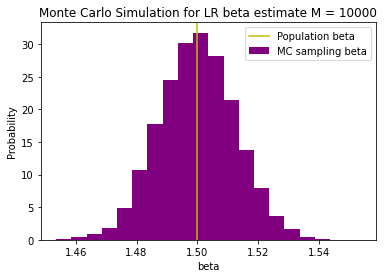

In [26]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Pseudo random number generator, the seed number could be indicated randomly
np.random.seed(2022)

# Parameters 
mu = 0 
sigma = 1 
n = 100 

# assumed population parameters
alpha = np.repeat(0.5, n)
beta = 1.5

# Core function of the program
def MC_estimation_slope(M):
    MC_betas = []
    MC_samples = {}

    for i in range(M):
        
        # randomly sampling from normal distribution as error terms
        e = np.random.normal(mu, sigma, n)
        
        # generating independent variable by making sure the variance in X is larger than the variance in error terms
        X = 9 * np.random.normal(mu, sigma, n)
        
        # population distribution using the assumd parameter values alpha/beta
        Y = (alpha + beta * X + e)
        
        # running OLS regression for getting slope parameters
        model = sm.OLS(Y.reshape((-1, 1)), X.reshape((-1, 1)))
        ols_result = model.fit()
        coeff = ols_result.params
        
        MC_samples[i] = Y
        MC_betas.append(coeff)
    MC_beta_hats = np.array(MC_betas).flatten()
    return(MC_samples, MC_beta_hats)
    
MC_samples, MC_beta_hats = MC_estimation_slope(M = 10000)
beta_hat_MC = np.mean(MC_beta_hats)

MC_beta_hats

beta_hat_MC

counts, bins, ignored  = plt.hist(MC_beta_hats, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 10000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()

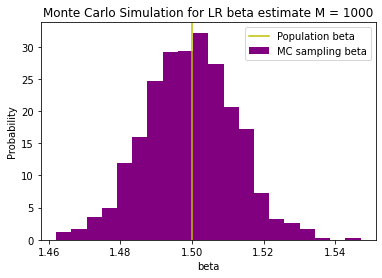

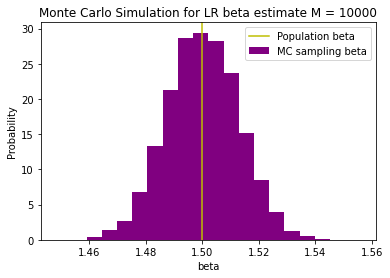

In [25]:
import matplotlib.pyplot as plt
MC_samples1000, MC_beta_hats1000 = MC_estimation_slope(M = 1000)
MC_samples10000, MC_beta_hats10000 = MC_estimation_slope(M = 10000)

# MC with M = 1000
counts, bins, ignored  = plt.hist(MC_beta_hats1000, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 1000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()

# MC with M = 10000
counts, bins, ignored  = plt.hist(MC_beta_hats10000, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 10000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()

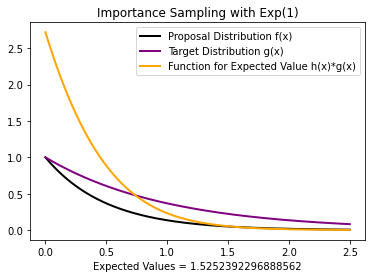

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#function in the expected value
def h(x):
    value = np.exp(-1*x + np.cos(x))
    return(value)

#proposal function which we have access to Exp(2)
def f(x):
    value = np.exp(-2*x)
    return(value)

#target distribution function
def g(x):
    value = np.exp(-1*x)
    return(value)

def Importance_sampling(M):
    importance_samples = []
    for i in range(M):
        #sampling from the proposal distribution f(x): Exp(2)
        x = np.random.exponential(2)
        importance_weight = g(x)/f(x)
        importance_sample = importance_weight*h(x)
        importance_samples.append(importance_sample)

    return(importance_samples)

importance_values = Importance_sampling(M = 1000)
Importance_Sampling_expected_value = np.mean(importance_values)
x_values = np.arange(0,2.5,0.001)
y_proposal = np.array(f(x_values))
y_target = np.array(g(x_values))
y_h = np.array(h(x_values)*g(x_values))
plt.plot(x_values,y_proposal, color ='black',linewidth = 2,label = 'Proposal Distribution f(x)')
plt.plot(x_values,y_target, color ='purple',linewidth = 2,label = 'Target Distribution g(x)')
plt.plot(x_values,y_h, color ='orange',linewidth = 2,label = 'Function for Expected Value h(x)*g(x)')
plt.title("Importance Sampling with Exp(1)")
plt.xlabel("Expected Values = " + str(Importance_Sampling_expected_value))
plt.legend()
plt.show()

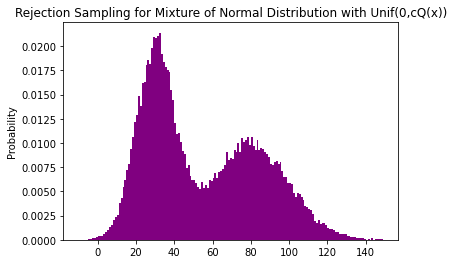

In [23]:
import numpy as np
from scipy.stats import norm

mu_ps = 30
sigma_ps = 10
mu_ps2 = 80
sigma_ps2 = 20

mu_q = 50
sigma_q = 30

def P_star(x):
    p_x = norm.pdf(x,mu_ps,sigma_ps) + norm.pdf(x,mu_ps2,sigma_ps2)
    return(p_x)

def Q(x):
    q_x = norm.pdf(x,mu_q,sigma_q)
    return(q_x)

def Rejection_Sampling_MixtureNormals(M,c):
    accepted_values = []

    for i in range(M):
        x = np.random.normal(mu_q, sigma_q)
        u = np.random.uniform(0,c * Q(x))

        if u <= P_star(x):
            accepted_values.append(x)

    return(np.array(accepted_values))

x = np.arange(-10,150)
c = max(P_star(x) / Q(x))
X_accepted = Rejection_Sampling_MixtureNormals(M = 100000,c = c)

import matplotlib.pyplot as plt
counts, bins, ignored = plt.hist(X_accepted, x, density = True,color = 'purple', label = 'accepted samples')
plt.title("Rejection Sampling for Mixture of Normal Distribution with Unif(0,cQ(x))")
plt.ylabel("Probability")
plt.show()


In [21]:
##################################################################################################
#                                  Random Walk Model Examples                                    #
##################################################################################################

In [22]:
import random

def random_walk(n):
    """Rerturn coordinates """
    
    x = 0
    y = 0